In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-03-31 23:53:19--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-03-31 23:53:19--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.005s  

2025-03-31 23:53:19 (38.1 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [2]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

#### Cuantos datos tiene la tabla

In [4]:
data.shape

(4238, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


#### Medidas de tendencia central de las variables.

In [6]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Grafico de Barras con el número de hombres y mujeres

<Axes: xlabel='male', ylabel='count'>

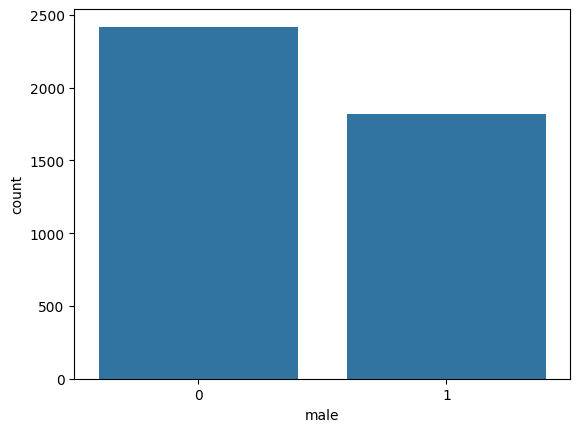

In [7]:
import seaborn as sns
sns.barplot(data["male"].value_counts())

#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



<Axes: xlabel='TenYearCHD', ylabel='count'>

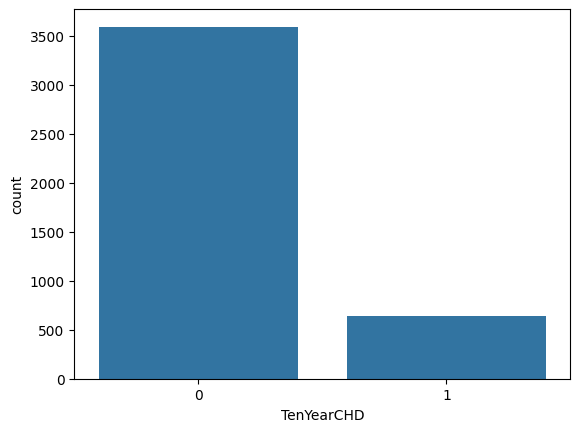

In [8]:
sns.barplot(data["TenYearCHD"].value_counts())

#### Realice un grafico de densidad del BMI

<Axes: xlabel='BMI', ylabel='Density'>

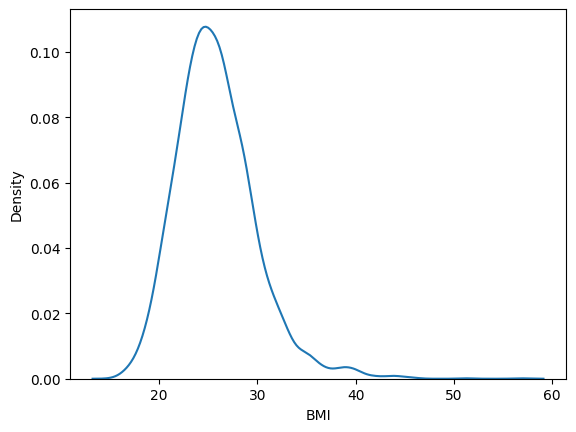

In [9]:
sns.kdeplot(data["BMI"])

#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

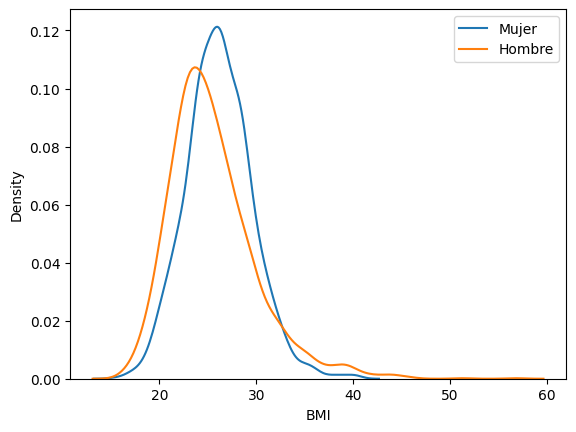

In [10]:
import matplotlib.pyplot as plt
sns.kdeplot(data[data["male"]==1]["BMI"])
sns.kdeplot(data[data["male"]==0]["BMI"])
plt.legend(["Mujer","Hombre"])

**Las mujeres tienen en promedio mayor BMI**

#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

**Los pares de varaiables mas correlacionadas son: Diabetes y glucosa, cigsperday y current smoker entre otros.**

<Axes: >

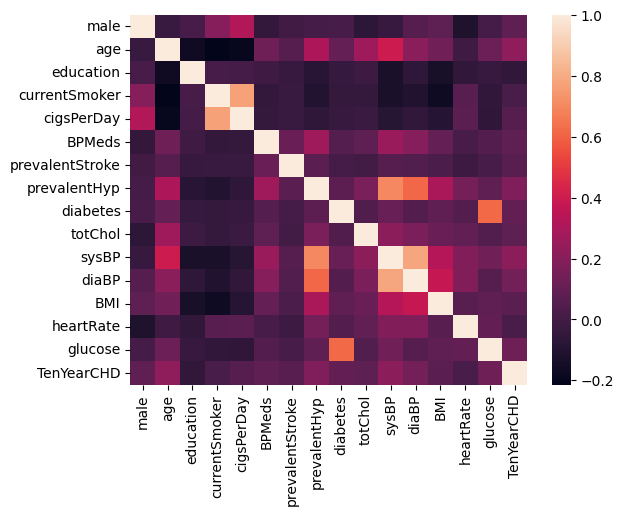

In [11]:
sns.heatmap(data.corr())

¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

<Axes: xlabel='male', ylabel='BMI'>

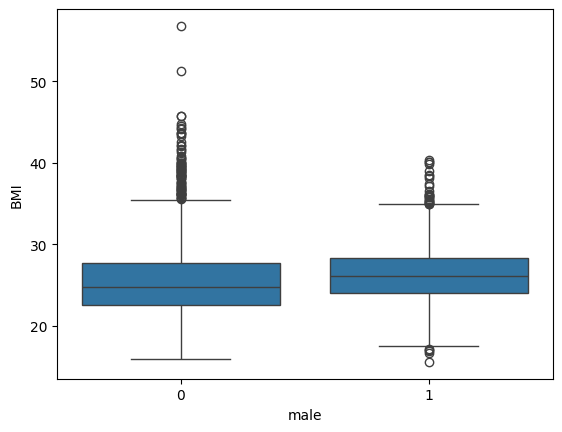

In [12]:
sns.boxplot(y= data["BMI"],x=data["male"])

<Axes: xlabel='male', ylabel='heartRate'>

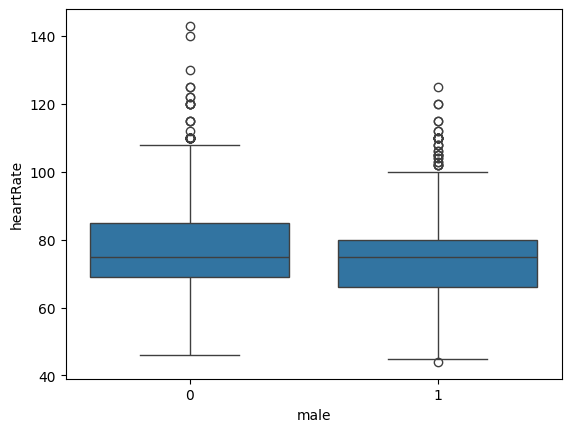

In [13]:
sns.boxplot(y= data["heartRate"],x=data["male"])

<Axes: xlabel='male', ylabel='glucose'>

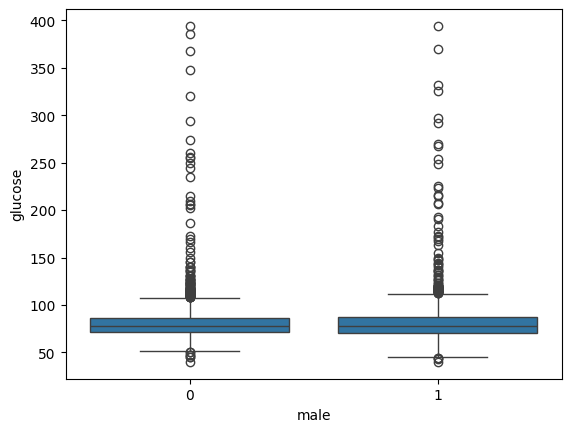

In [14]:
sns.boxplot(y= data["glucose"],x=data["male"])

### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [15]:
data.isna().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [17]:
datadrop = data.dropna()

In [18]:
datadrop.shape


(3656, 16)

#### Seleccione sus variables X y su variable y

In [19]:
datadrop = data.dropna()
x= datadrop[["male","age","cigsPerDay","BPMeds","prevalentHyp","diabetes","sysBP","diaBP","BMI","heartRate","glucose"]]
y= datadrop["TenYearCHD"]

#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123)

In [21]:
x_train.shape

(2559, 11)

In [22]:
x_test.shape

(1097, 11)

#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [119]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [120]:
intercept = model.intercept_
coef = model.coef_

print(f"Intercept (beta_0): {intercept[0]:.2f}")
print(f"Coeficiente (beta_1): {coef}")

Intercept (beta_0): -1.60
Coeficiente (beta_1): [[ 0.01966055  0.04181843  0.03033338  0.33160407  0.98229968  0.54401549
   0.0102659  -0.02150967 -0.04333307 -0.02349097  0.00382349]]


**El coeficiente que tiene un efecto mayor sobre el desarrollo de una enfermedad cardiaca es la variable de "Prevalent Hyp" que determina si el paciente es o no hipertenso**

#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

In [123]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy del modelo: {accuracy:.2f}')

matriz_confusion = confusion_matrix(y_test, y_pred_test)
print('Matriz de Confusión:')
display(matriz_confusion)

reporte = classification_report(y_test, y_pred_test)
print('Reporte de Clasificación:')
print(reporte)

precision = precision_score(y_test, y_pred_test)
print(f"Precisión: {precision:.2f}")

recall = recall_score(y_test, y_pred_test)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred_test)
print(f"F1-score: {f1:.2f}")

Accuracy del modelo: 0.84
Matriz de Confusión:


array([[912,   6],
       [169,  10]])

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       918
           1       0.62      0.06      0.10       179

    accuracy                           0.84      1097
   macro avg       0.73      0.52      0.51      1097
weighted avg       0.81      0.84      0.78      1097

Precisión: 0.62
Recall: 0.06
F1-score: 0.10


In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, auc

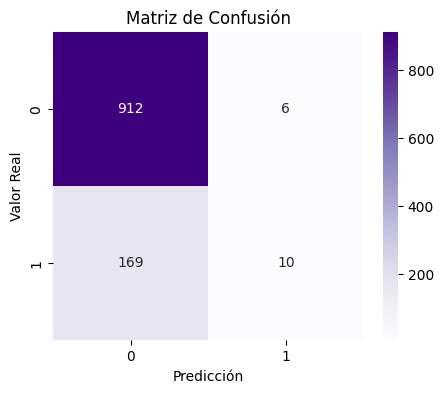

In [126]:
plt.figure(figsize=(5, 4))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Purples')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

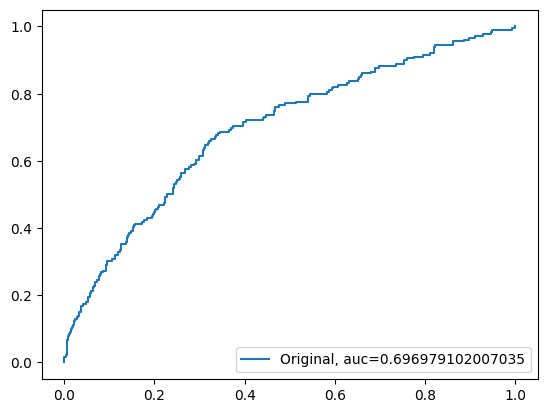

In [127]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Original, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Área bajo la curva ROC: 0.70


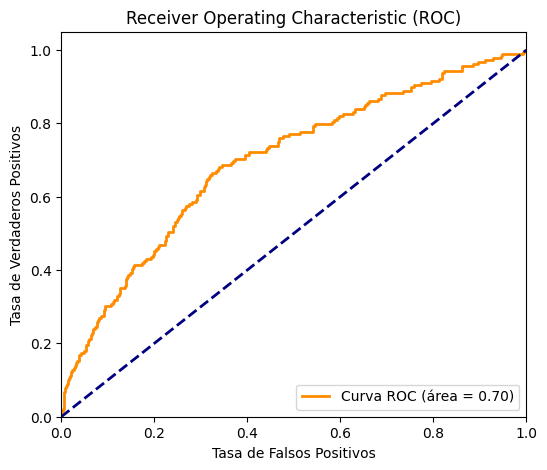

In [131]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f'Área bajo la curva ROC: {roc_auc:.2f}')

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

**La curva ROC y el AUC de 0.70 indican que el modelo de clasificación funciona mejor que el azar, pero aún hay margen de mejora. Tiene una capacidad moderada para clasificar correctamente las instancias positivas y negativas.**

## Corrección desbalance de clases
1. Busque la funcion train_test_split en su codigo y agregue la opcion stratify  = y . Por que esto ayudaría con el desblance?
2. usando from imblearn.over_sampling import SMOTE mejore el performance
 3. Saque todo el modelo y la matriz y la grafica de ROC AUC

In [134]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123, stratify=y)
model = LogisticRegression()

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**La función stratify=y ayuda al desbalance ya que le esta diciendo al codigo que mantenga las proporciones de las diferentes clases de la variable objetivo en ambos conjuntos (entrenamiento y prueba) de manera similar a como están en el conjunto de datos original.**

In [177]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 ,stratify=y, random_state=123)

smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


model = LogisticRegression()
model.fit(x_train_smote, y_train_smote)

y_pred_smote = model.predict(x_test)
y_pred_proba_smote = model.predict_proba(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_smote)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 427.9555555555555, 'Predicted label')

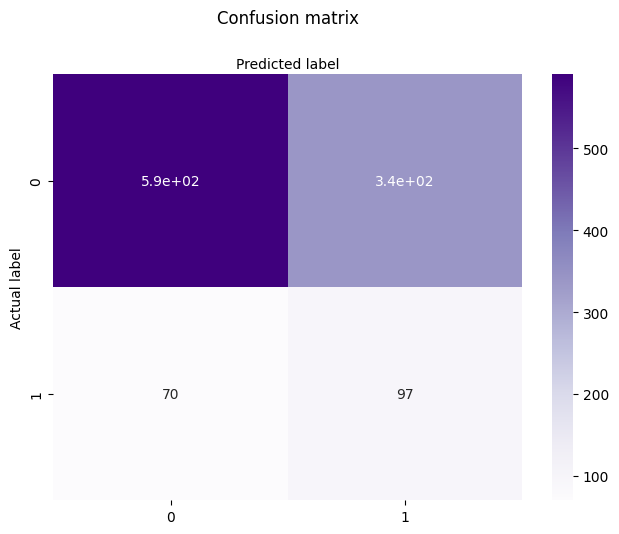

In [178]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Purples")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [179]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_smote))
print("Precision:",metrics.precision_score(y_test, y_pred_smote))
print("Recall:",metrics.recall_score(y_test,  y_pred_smote))
print("F1-Score:",metrics.f1_score(y_test,  y_pred_smote))

Accuracy: 0.6271649954421149
Precision: 0.22247706422018348
Recall: 0.5808383233532934
F1-Score: 0.32172470978441126


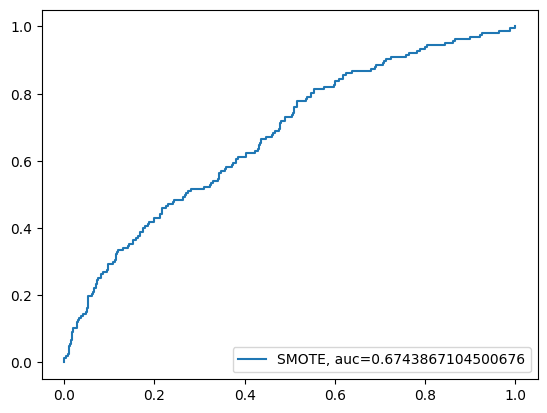

In [180]:
y_pred_proba_smote = model.predict_proba(x_test)[::,1]
fpr_smote, tpr_smote, _ = metrics.roc_curve(y_test,  y_pred_proba_smote)
auc_smote = metrics.roc_auc_score(y_test, y_pred_proba_smote)
plt.plot(fpr_smote,tpr_smote,label="SMOTE, auc="+str(auc_smote))
plt.legend(loc=4)
plt.show()

## Pinter el resultado con SMOTE y sin SMOTE

In [182]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test,  y_pred))
print("F1-Score:",metrics.f1_score(y_test,  y_pred))


Accuracy: 0.8468550592525068
Precision: 0.47619047619047616
Recall: 0.059880239520958084
F1-Score: 0.10638297872340426


### Como mejora su modelo con StandardScaler()

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 ,stratify=y, random_state=123)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [185]:
smote = SMOTE(random_state=123)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)
model_scaled  = LogisticRegression(max_iter=1000)
model_scaled.fit(x_train_smote, y_train_smote)
y_pred_smote_scaler = model_scaled.predict(x_test_scaled)

Text(0.5, 427.9555555555555, 'Predicted label')

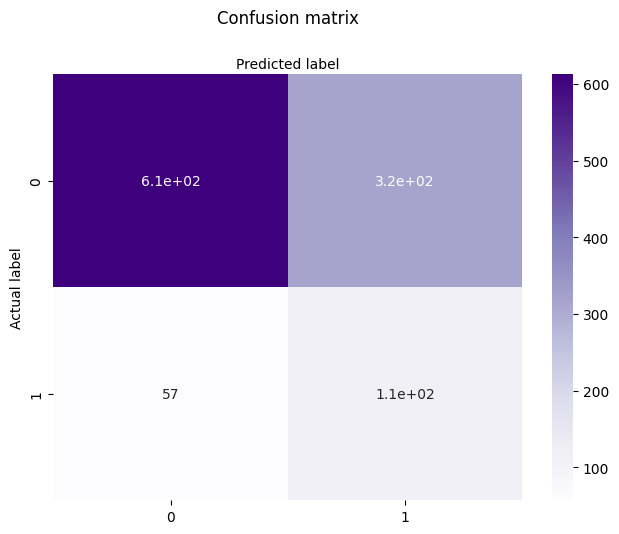

In [186]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_smote_scaler)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Purples")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


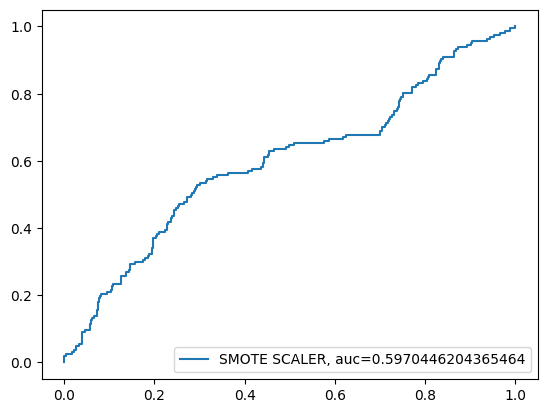

In [187]:
y_pred_proba_smote_scaler= model.predict_proba(x_test_scaled)[::,1]
fpr_scaler, tpr_scaler, _ = metrics.roc_curve(y_test,  y_pred_proba_smote_scaler)
auc_scaler = metrics.roc_auc_score(y_test,y_pred_proba_smote_scaler)
plt.plot(fpr_scaler,tpr_scaler,label="SMOTE SCALER, auc="+str(auc_scaler))
plt.legend(loc=4)
plt.show()

### Pinte todas las graficas original SMOTE y SMOTE Scaler

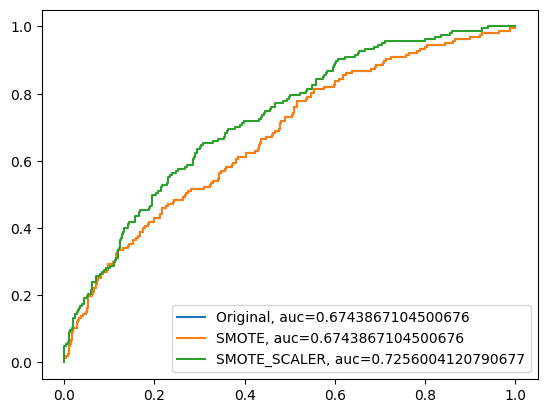

In [189]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Original, auc="+str(auc))

y_pred_proba_smote = model.predict_proba(x_test)[::,1]
fpr_smote, tpr_smote, _ = metrics.roc_curve(y_test,  y_pred_proba_smote)
auc_smote = metrics.roc_auc_score(y_test, y_pred_proba_smote)
plt.plot(fpr_smote,tpr_smote,label="SMOTE, auc="+str(auc_smote))

y_pred_proba_scaler = model_scaled.predict_proba(x_test_scaled)[::,1]
fpr_scaler, tpr_scaler, _ = metrics.roc_curve(y_test,  y_pred_proba_scaler)
auc_scaler = metrics.roc_auc_score(y_test, y_pred_proba_scaler)
plt.plot(fpr_scaler,tpr_scaler,label="SMOTE_SCALER, auc="+str(auc_scaler))


plt.legend(loc=4)
plt.show()